In [1]:
import tasks_reader.tasks_reader_facade as tasks_reader_facade
import tasks_reader.tasks_filter as tasks_filter
import work_estimation_console_adapter

In [2]:
path_to_file = "test_tasks.xlsx"
sheet_name = "tasks"
first_row = 4
last_row = 18
rows_to_skip = '6,9:11'
columns_mapping = {
    'uid': 'A',
    'name': 'B',
    'blockers': 'C',
    'min_estimate': 'E',
    'normal_estimate': 'F',
    'max_estimate': 'G'
}
filter_predicates = [tasks_filter.MinEstimateRequiredPredicate(),
                     tasks_filter.NormalEstimateRequiredPredicate(),
                     tasks_filter.MaxEstimateRequiredPredicate()]

valid_task_rows, task_row_errors = tasks_reader_facade.read_from_excel(file=path_to_file, 
                                            sheet=sheet_name, 
                                            first_row=first_row,
                                            last_row=last_row,
                                            columns_mapping=columns_mapping, 
                                            rows_to_skip=rows_to_skip,
                                            filter_predicates=filter_predicates)

print('Read valid {} task rows'.format(len(valid_task_rows)))
print('--------------------------------------------')
for error in task_row_errors:
    print(error)

Read valid 9 task rows
--------------------------------------------
Task with uid: 'TASK-3' was filtered due to: ['min_estimate field is required', 'normal_estimate field is required', 'max_estimate field is required']
Task with uid: 'TASK-6' was filtered due to: ['min_estimate field is required', 'max_estimate field is required']


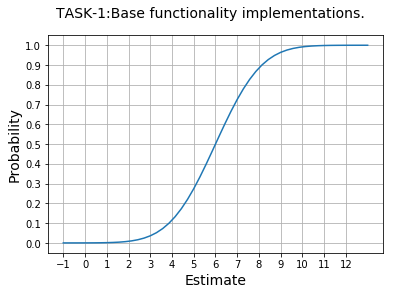

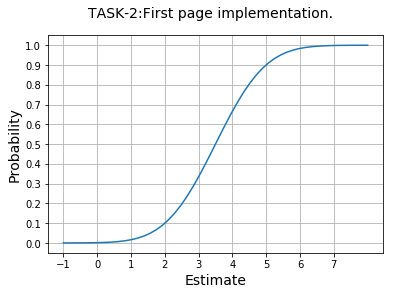

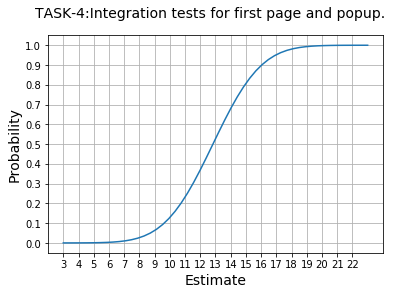

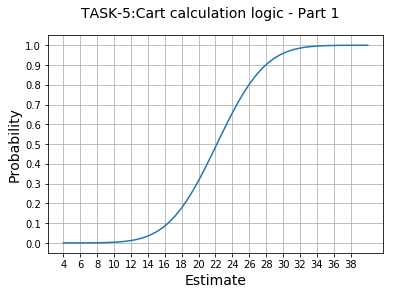

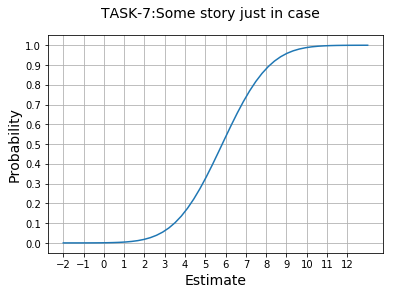

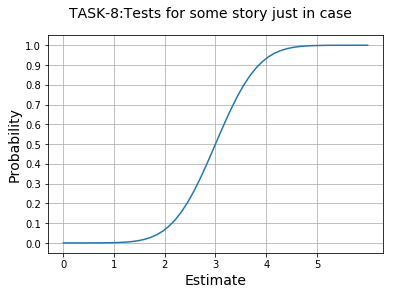

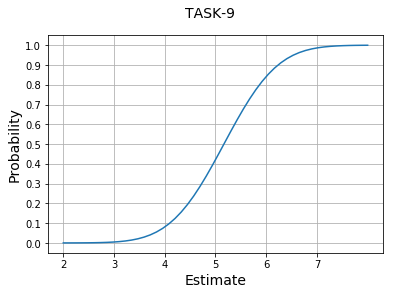

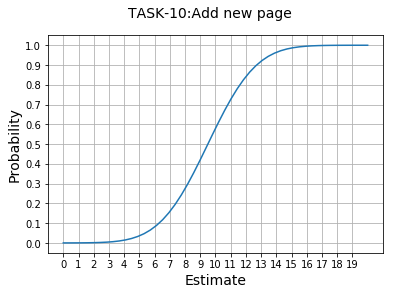

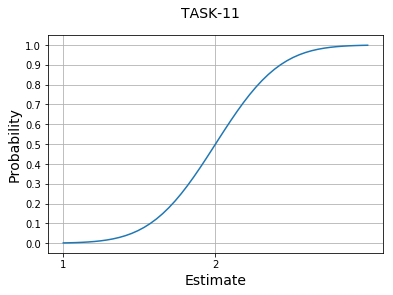

In [3]:
for task_row in valid_task_rows:
    work_estimation_console_adapter.print_normal_distribution_for_task(task_row)

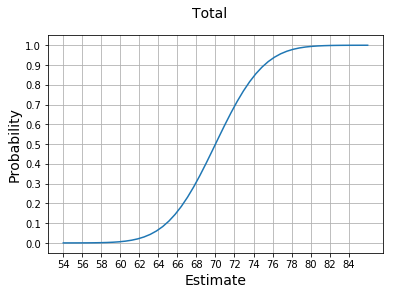

In [4]:
work_estimation_console_adapter.print_normal_distribution_for_tasks(valid_task_rows)

In [5]:
number_of_developers = 3

In [6]:
work_estimation_console_adapter.emulate_use_normal_estimate(valid_task_rows, number_of_developers)

----------------------------------------------------------------------------------------
6 task rows are valid for emulation from 9
----------------------------------------------------------------------------------------
Next errors occurred:
Task TASK-4 filtered due to missing of last blocker in chain: ['TASK-3']
Task TASK-7 filtered due to missing of last blocker in chain: ['TASK-6']
Task TASK-8 filtered due to missing of last blocker in chain: ['TASK-7', 'TASK-6']
----------------------------------------------------------------------------------------
     worker0  worker1 worker2
day                          
1     TASK-1  TASK-11  TASK-5
2     TASK-1  TASK-11  TASK-5
3     TASK-1     None  TASK-5
4     TASK-1     None  TASK-5
5     TASK-1     None  TASK-5
6     TASK-9   TASK-2  TASK-5
7     TASK-9   TASK-2  TASK-5
8     TASK-9   TASK-2  TASK-5
9     TASK-9     None  TASK-5
10    TASK-9     None  TASK-5
11   TASK-10     None  TASK-5
12   TASK-10     None  TASK-5
13   TASK-10     No

In [7]:
number_of_emulation = 100

----------------------------------------------------------------------------------------
6 task rows are valid for emulation from 9
----------------------------------------------------------------------------------------
Next errors occurred:
Task TASK-4 filtered due to missing of last blocker in chain: ['TASK-3']
Task TASK-7 filtered due to missing of last blocker in chain: ['TASK-6']
Task TASK-8 filtered due to missing of last blocker in chain: ['TASK-7', 'TASK-6']
----------------------------------------------------------------------------------------


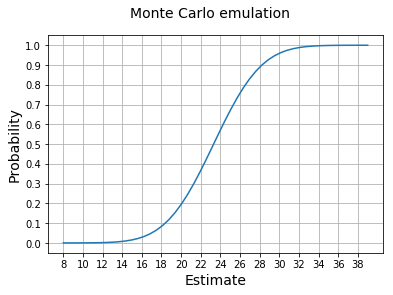

In [8]:
work_estimation_console_adapter.emulate_use_monte_carlo_method(valid_task_rows, 
                                                               number_of_developers, 
                                                               number_of_emulation)